In [1]:
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
import numpy
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

In [2]:
df = pd.read_csv("Casos_positivos_de_COVID-19_en_Colombia.csv", delimiter=",")

In [3]:
df = df.apply(lambda x: x.astype(str).str.upper())

In [4]:
df.head()

,ID de caso,Fecha de notificación,Codigo DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web
0,1,2020-03-02T00:00:00.000,11001,BOGOTÁ D.C.,BOGOTÁ D.C.,RECUPERADO,19,F,IMPORTADO,LEVE,ITALIA,2020-02-27T00:00:00.000,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000
1,2,2020-03-06T00:00:00.000,76111,GUADALAJARA DE BUGA,VALLE DEL CAUCA,RECUPERADO,34,M,IMPORTADO,LEVE,ESPAÑA,2020-03-04T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000
2,3,2020-03-07T00:00:00.000,5001,MEDELLÍN,ANTIOQUIA,RECUPERADO,50,F,IMPORTADO,LEVE,ESPAÑA,2020-02-29T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000
3,4,2020-03-09T00:00:00.000,5001,MEDELLÍN,ANTIOQUIA,RECUPERADO,55,M,RELACIONADO,LEVE,COLOMBIA,2020-03-06T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
4,5,2020-03-09T00:00:00.000,5001,MEDELLÍN,ANTIOQUIA,RECUPERADO,25,M,RELACIONADO,LEVE,COLOMBIA,2020-03-08T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000


Count the number of missing values in the dataset

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.columns

Index(['ID de caso', 'Fecha de notificación', 'Codigo DIVIPOLA',
       'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad',
       'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'FIS',
       'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado',
       'fecha reporte web'],
      dtype='object')

# Summary on number of cases, deaths and recoveries as of the last report date

In [7]:
date = df.sort_values(by = "Fecha de notificación")
last_report_date = date.iloc[-1]["Fecha de notificación"]
Cases = len(df["ID de caso"])
deaths = len(df[df["atención"] == "FALLECIDO"])
recovered = len(df[df["atención"] == "RECUPERADO"])

print("Number of confirmed cases as of {}: {}".format(last_report_date[0:10], Cases))
print("Number of confirmed recoveries as of {}: {}".format(last_report_date[0:10], recovered))
print("Number of confirmed deaths as of {}: {}".format(last_report_date[0:10], deaths))
print("Number of active cases as of {}: {}".format(last_report_date[0:10], Cases - deaths - recovered))

Number of confirmed cases as of 2020-04-25: 5142
Number of confirmed recoveries as of 2020-04-25: 1067
Number of confirmed deaths as of 2020-04-25: 233
Number of active cases as of 2020-04-25: 3842


# Distribución by age

In [8]:
fig = px.histogram(df, x="Edad", nbins=20, title = "Confirmed case distribution by age")
fig.show()

In [9]:
fig = px.histogram(df[df["atención"] == "RECUPERADO"], x="Edad", nbins=10, title = "Recoveries distribution by age")
fig.show()

In [10]:
fig = px.histogram(df[df["atención"] == "FALLECIDO"], x="Edad", nbins=10, title = "Deaths distribution by age")
fig.show()

# Distribution by gender

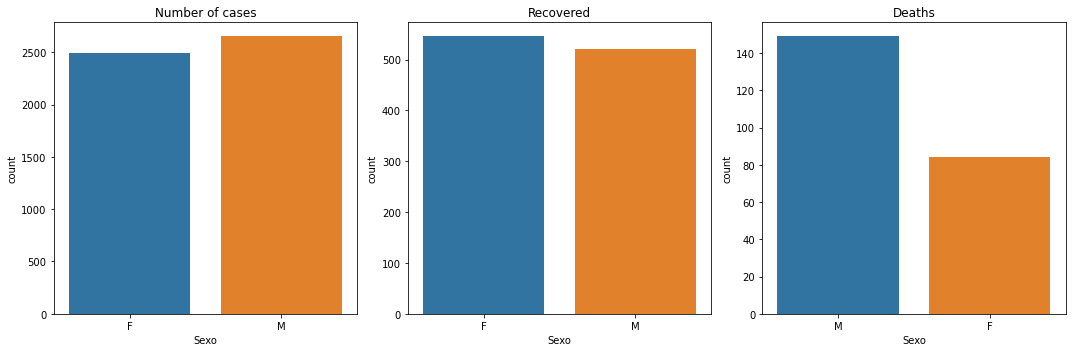

In [11]:
fig, ax = pyplot.subplots(1,3, figsize=(15, 5))
sns.countplot(x = "Sexo", data=df, ax=ax[0])
sns.countplot(x = "Sexo", data=df[df["atención"] == "RECUPERADO"], ax=ax[1])
sns.countplot(x = "Sexo", data=df[df["atención"] == "FALLECIDO"], ax=ax[2])
ax[0].set_title("Number of cases")
ax[1].set_title("Recovered")
ax[2].set_title("Deaths")
pyplot.tight_layout()

# Distribution by type

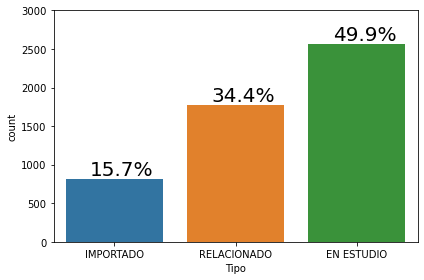

In [12]:
pyplot.figure()
ax = sns.countplot(x = "Tipo", data=df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/Cases)
        x = p.get_x() + p.get_width()/4
        y = p.get_y() + p.get_height() + 50
        ax.annotate(percentage, (x, y), fontsize=20)
pyplot.ylim(0, 3000)
pyplot.tight_layout()

# Distribution of time between diagnose and death

In [13]:
dead_people = df[df["atención"] == "FALLECIDO"]

In [14]:
Diagnose_time = pd.to_datetime(dead_people["Fecha diagnostico"])

In [15]:
Death_time = pd.to_datetime(dead_people["Fecha de muerte"])

In [16]:
Diagnose_time.head(3)

151   2020-03-20
152   2020-03-20
156   2020-03-20
Name: Fecha diagnostico, dtype: datetime64[ns]

In [17]:
Death_time.head(3)

151   2020-04-05
152   2020-04-06
156   2020-03-23
Name: Fecha de muerte, dtype: datetime64[ns]

In [18]:
difference_diagnose = Death_time - Diagnose_time

In [19]:
difference_diagnose.head(3)

151   16 days
152   17 days
156    3 days
dtype: timedelta64[ns]

In [20]:
difference_diagnose = difference_diagnose.apply(lambda l: l.days)

In [21]:
df["Diferencia D_M (días)"] = difference_diagnose

In [22]:
fig = px.histogram(df, x="Diferencia D_M (días)", nbins=10, title = "Time passed between diagnose and death")
fig.show()

It is weird that there is a non-negligible portion of the data with negative days count between diagnose and death date. This is possible due to a delay on the diagnose of the cause of death of even more than 20 days (which is incredible). To support this, let's draw a sample from the dataset. In this sample, the death date is reported to be on 2020/04/24 and the diagnose date is reported to be on 2020/24/04, which corresponds to a delay of 27 days.

In [23]:
df[df["Diferencia D_M (días)"] < -20]

,ID de caso,Fecha de notificación,Codigo DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Diferencia D_M (días)
4817,4818,2020-03-24T00:00:00.000,47001,SANTA MARTA,SANTA MARTA D.T. Y C.,FALLECIDO,41,M,EN ESTUDIO,FALLECIDO,COLOMBIA,2020-03-15T00:00:00.000,2020-03-28T00:00:00.000,2020-04-24T00:00:00.000,- -,2020-04-24T00:00:00.000,-27.0


# Distribution of time between symptomps appeared and death

In [24]:
Symptoms_time = pd.to_datetime(dead_people["FIS"])

In [25]:
difference_symptomps = Death_time - Symptoms_time

In [26]:
difference_symptomps = difference_symptomps.apply(lambda l: l.days)

In [27]:
df["Diferencia S_M (días)"] = difference_symptomps

In [28]:
fig = px.histogram(df, x="Diferencia S_M (días)", nbins=10, title = "Time passed between symptomps appeared and death")
fig.show()

This histogram shows that the largest count of people dies within 15 to 19 after reporting symptomps, and there is a span of 0 to 6 weeks for death to come after symptomps appeared in Colombian population. It might be worthy to see the distribution of ages of the people dying within 0 and 5 days, as shown in the following histrogram.

In [29]:
fig = px.histogram(df[(df["Diferencia S_M (días)"] > 0) & (df["Diferencia S_M (días)"] < 5)], x="Edad", nbins=10, title = "Age distribution of people dying after 0 to 5 days after symptomps appeared")
fig.show()

What about people surviving 20 to 25 days? One might expect that they correspond to a much younger population, let's see...

In [30]:
fig = px.histogram(df[(df["Diferencia S_M (días)"] > 20) & (df["Diferencia S_M (días)"] < 25)], x="Edad", nbins=10, title = "Age distribution of people dying after 20 to 25 days after symptomps appeared")
fig.show()

People dying in a time span of 0 to 4 days have a peak at a larger age interval than those who survive between 20 to 25 days...

# Distribution by cases

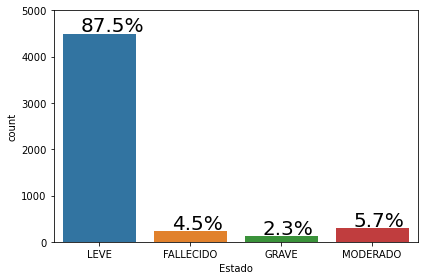

In [31]:
pyplot.figure()
ax = sns.countplot(x = "Estado", data=df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/Cases)
        x = p.get_x() + p.get_width()/4
        y = p.get_y() + p.get_height() + 50
        ax.annotate(percentage, (x, y), fontsize=20)
pyplot.ylim(0, 5000)
pyplot.tight_layout()

This plot shows a mortality rate of 4.5\% for COVID-19 in Colombia. Most of the cases are mild cases. 

# Geographical View

To be continued...

The data presented in this notebook is extracted from official source: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data